In [1]:
using PyPlot, LinearAlgebra, FFTW

In [2]:
# Show interpolation via sparse inversion
# S: Sampling operator 
# F: Fourier DFT operator in explicit matrix form
# m: Desired data
# d_obs: Observed data
# a: Fourier coefficients that synthetize the data

# Compute a that minimizes J = || S F a - d_obs||_2^2 + mu ||a||_1
# Then predict interpolated data d_pred = F a


# Make a signal for testing 

 M = 256
 x = collect(0:1:M-1)
 m  = cos.(2*pi*0.091*x.+0.1) + cos.(2*pi*0.021*x.+0.3)+0.1*randn(M)
 h  = 0.54.-0.46.*cos.(2*pi*x/M)

 m  = m.*h       # True signal


S=diagm(ones(M))

S[:,5:10].=0.
S[:,15:17].=0.
S[:,25:59].=0.
S[:,125:199].=0.

# The Fourier Operator 
k = (0:1:M-1)*2*pi/M
F = exp.(im*x*k')

d_obs = S*m     # Observed data is sampled data 

L = S*F         # This is the linear operator to invert 

mu = 0.6

# Start IRLS in implicit form via Steepest Descent 

a = L'*d_obs

Save_P=zeros(400,M)
Save_Q=zeros(400,M)
for k=1:400
    q = 1.0./(abs.(a).+0.01)
    Q = Diagonal(q)
    r = S*(bfft(a))-d_obs                # r = SFa-d_obs
    a = a .-0.005*(fft(S'*r).+ mu*Q*a)   # a = a -0.005*(F^H S^T(r))
    Save_P[k,:]=abs.(a)
    Save_Q[k,:]=abs.(q)
end

# Of course, this is much faster with CGLS rather than SD..

    d_pred = real.(F*a);



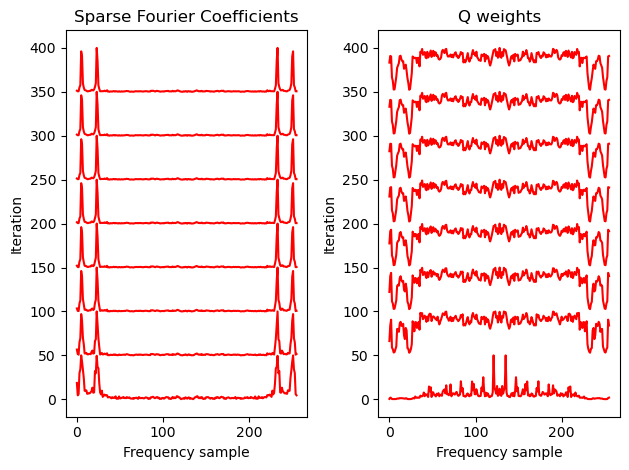

In [5]:
figure(1)
close("all")
subplot(121)
for k=1:50:400
    aux = Save_P[k,:]
    aux_max = maximum(abs.(aux))
plot(50*aux/aux_max.+k.-1,"r")
end
xlabel("Frequency sample")
ylabel("Iteration")
title("Sparse Fourier Coefficients")

figure(1)

subplot(122)
for k=1:50:400
    aux = Save_Q[k,:]
    aux_max = maximum(abs.(aux))
plot(50*aux/aux_max.+k.-1,"r")
end
xlabel("Frequency sample")
ylabel("Iteration")
title("Q weights")

tight_layout()
savefig("./figs/1d_reconstruction_implicit_spectra_and_weights.png")

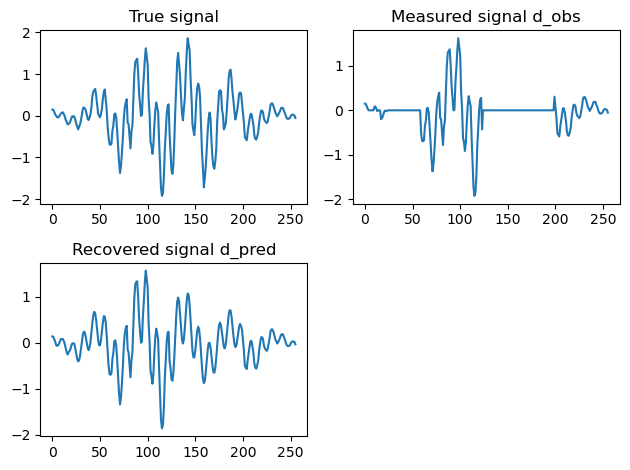

In [6]:
figure(2)
subplot(221); plot(m); title("True signal")
subplot(222); plot(d_obs); title("Measured signal d_obs")
subplot(223); plot(d_pred); title("Recovered signal d_pred")
tight_layout()
savefig("./figs/1d_reconstruction_implicit.png")

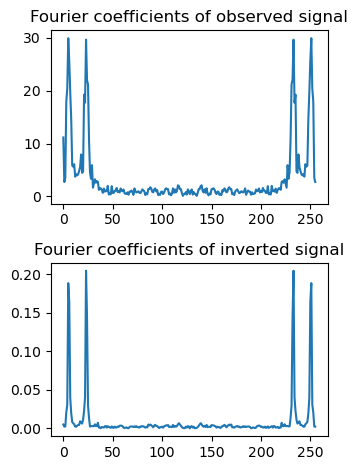

In [7]:
subplot(221);plot(abs.(F'*d_obs));title("Fourier coefficients of observed signal")
subplot(223);plot(abs.(a));title("Fourier coefficients of inverted signal")
tight_layout()
savefig("./figs/1d_reconstruction_implicit_spectra.png")